Perform preprocessing and EDA as per requirements. [ Attached is the dataset "Consumo_cerveja.csv" ]
- You have to predict the beer consumption for the column "Consumo de cerveja (litros)"
- Train the model using the neural network architecture.
- Evaluate the model using the metrics.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [70]:
df= pd.read_csv('Consumo_cerveja.csv')

In [71]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [72]:
df['Consumo de cerveja (litros)'].value_counts()

Consumo de cerveja (litros)
24.862    3
25.343    2
24.227    2
22.933    2
26.594    2
         ..
20.452    1
19.761    1
20.812    1
21.838    1
22.446    1
Name: count, Length: 359, dtype: int64

In [73]:
df.info()
# Assuming df['Data'] contains date strings, first convert them to datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# List of days for easy mapping
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [74]:
# Now apply the lambda function to extract the weekday
df['Day'] = df['Data'].apply(lambda a: days[a.weekday()] if pd.notnull(a) else 'Invalid Date' )

# Display the updated dataframe
print(df)

          Data Temperatura Media (C) Temperatura Minima (C)  \
0   2015-01-01                  27,3                   23,9   
1   2015-01-02                 27,02                   24,5   
2   2015-01-03                 24,82                   22,4   
3   2015-01-04                 23,98                   21,5   
4   2015-01-05                 23,82                     21   
..         ...                   ...                    ...   
936        NaT                   NaN                    NaN   
937        NaT                   NaN                    NaN   
938        NaT                   NaN                    NaN   
939        NaT                   NaN                    NaN   
940        NaT                   NaN                    NaN   

    Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                     32,5                 0              0.0   
1                     33,5                 0              0.0   
2                     29,9                 0    

In [75]:
data = df['Consumo de cerveja (litros)'].values
data

array([25.461, 28.972, 30.814, 29.799, 28.9  , 28.218, 29.732, 28.397,
       24.886, 37.937, 36.254, 25.743, 26.99 , 31.825, 25.724, 29.938,
       37.69 , 30.524, 29.265, 35.127, 29.13 , 25.795, 21.784, 28.348,
       31.088, 21.52 , 29.972, 22.603, 22.696, 26.845, 27.03 , 32.057,
       24.097, 31.655, 24.738, 19.95 , 22.821, 28.893, 29.926, 24.062,
       21.137, 26.805, 26.389, 24.219, 30.231, 24.968, 25.343, 17.399,
       21.392, 22.922, 24.567, 30.943, 30.825, 25.692, 26.959, 25.366,
       22.784, 26.241, 26.467, 27.475, 28.749, 24.146, 22.988, 30.3  ,
       22.654, 29.09 , 24.619, 20.016, 23.042, 22.933, 22.409, 21.281,
       28.844, 32.872, 20.903, 26.275, 20.167, 23.628, 24.213, 28.631,
       25.855, 21.406, 21.617, 22.401, 27.989, 24.974, 29.76 , 26.116,
       25.85 , 24.925, 21.979, 22.116, 24.867, 33.45 , 32.713, 22.356,
       21.004, 23.362, 20.298, 24.862, 30.505, 25.07 , 22.62 , 22.001,
       23.469, 21.735, 21.593, 33.822, 28.028, 24.304, 31.108, 19.113,
      

In [76]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [77]:
targets

array([[0.58807324],
       [0.6522421 ],
       [0.59565991],
       [0.44685089],
       [1.        ],
       [0.92866831],
       [0.48317369],
       [0.53602611],
       [0.74095109],
       [0.4823684 ],
       [0.66097313],
       [0.98953124],
       [0.68580995],
       [0.63244893],
       [0.88090192],
       [0.62672713],
       [0.48537764],
       [0.31537679],
       [0.59358311],
       [0.70971433],
       [0.30418751],
       [0.66241417],
       [0.35008901],
       [0.35403069],
       [0.52988048],
       [0.53772145],
       [0.7507841 ],
       [0.41341019],
       [0.73374587],
       [0.44057811],
       [0.23764516],
       [0.35932864],
       [0.61668221],
       [0.66046452],
       [0.41192676],
       [0.28795456],
       [0.52818513],
       [0.51055353],
       [0.418581  ],
       [0.67339154],
       [0.45032635],
       [0.46622023],
       [0.12952446],
       [0.2987624 ],
       [0.36360939],
       [0.43333051],
       [0.7035687 ],
       [0.698

<Axes: xlabel='Day', ylabel='Consumo de cerveja (litros)'>

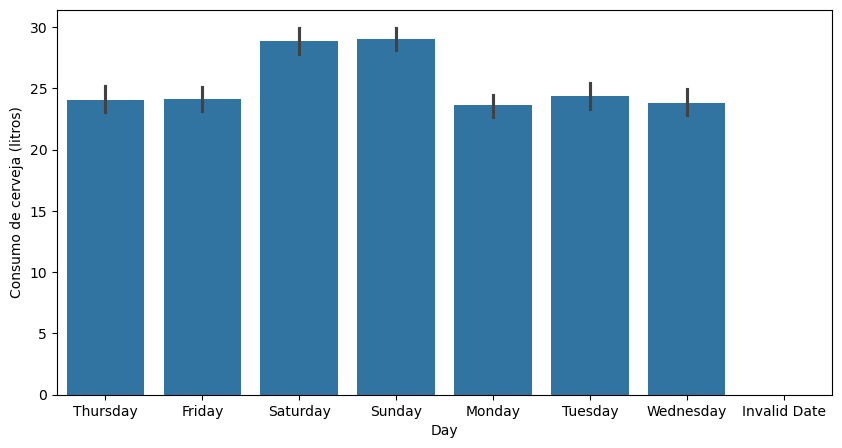

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day" , y="Consumo de cerveja (litros)" , data=df)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [80]:
print(X_train.shape)

(748, 5, 1)


In [81]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')


In [82]:
from tensorflow.keras import layers, models

model_rnn = models.Sequential(name="RNN")
model_rnn.add(layers.SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(layers.SimpleRNN(50, activation='relu'))
model_rnn.add(layers.Dense(64, activation='relu'))
model_rnn.add(layers.Dropout(0.3))
model_rnn.add(layers.Dense(32, activation='relu'))
model_rnn.add(layers.Dense(1))
model_rnn.compile(optimizer='RMSprop', loss='mean_squared_error')

In [83]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan


In [84]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan 
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 16/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan


In [86]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan


In [88]:
print(X_test.shape)

(188, 5, 1)


In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_test, y_test, scaler):
    # Reshape X_test for prediction
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Get predictions
    y_pred = model.predict(X_test_reshaped)
    
    # Check for NaN in y_pred
    if np.isnan(y_pred).any():
        print("NaN values found in predictions!")
    
    # Inverse transform the predicted and actual values
    try:
        y_pred = scaler.inverse_transform(y_pred).flatten()
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    except ValueError as e:
        print(f"Error during inverse transformation: {e}")
        return None

    # Check for NaN in y_test and y_pred
    if np.isnan(y_test).any() or np.isnan(y_pred).any():
        print("NaN values found after inverse transform!")
    
    # Remove NaN values from y_test and y_pred
    valid_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
    y_test_clean = y_test[valid_mask]
    y_pred_clean = y_pred[valid_mask]
    
    # Ensure arrays are not empty after removing NaNs
    if len(y_test_clean) == 0 or len(y_pred_clean) == 0:
        print("Error: No valid samples left after removing NaN values.")
        return None
    
    # Calculate mean squared error on cleaned data
    mse = mean_squared_error(y_test_clean, y_pred_clean)
    return mse

# Example usage for RNN, LSTM, and GRU models
mse_rnn = evaluate_model(model_rnn, X_test, y_test, scaler)
mse_lstm = evaluate_model(model_lstm, X_test, y_test, scaler)
mse_gru = evaluate_model(model_gru, X_test, y_test, scaler)

# Print results if they are not None
if mse_rnn is not None:
    print(f"RNN Mean Squared Error: {mse_rnn}")
if mse_lstm is not None:
    print(f"LSTM Mean Squared Error: {mse_lstm}")
if mse_gru is not None:
    print(f"GRU Mean Squared Error: {mse_gru}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
NaN values found in predictions!
NaN values found after inverse transform!
Error: No valid samples left after removing NaN values.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
NaN values found in predictions!
NaN values found after inverse transform!
Error: No valid samples left after removing NaN values.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
NaN values found in predictions!
NaN values found after inverse transform!
Error: No valid samples left after removing NaN values.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


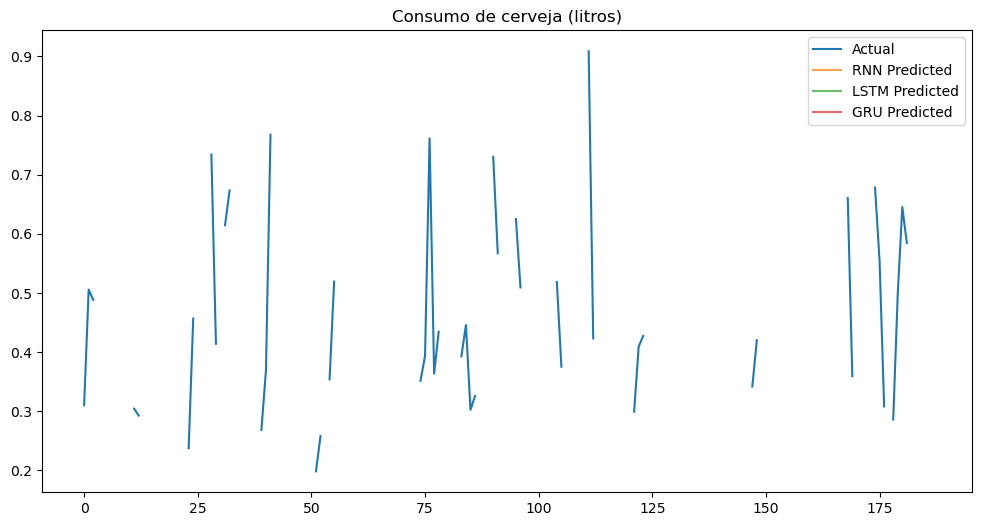

In [92]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Consumo de cerveja (litros)')
plt.show()